In [2]:
import pandas as pd
import numpy as np
import numba
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('ps.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<AxesSubplot:>

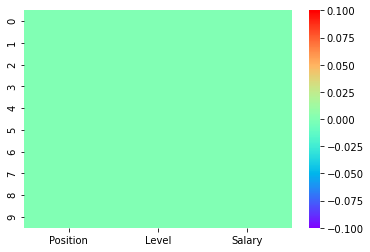

In [9]:
sns.heatmap(df.isnull(), yticklabels = True, cmap = 'rainbow')

## Do we need encoding ?

In [10]:
X = df.iloc[:, 1:2]
X


,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [11]:
Y = df.iloc[:, 2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


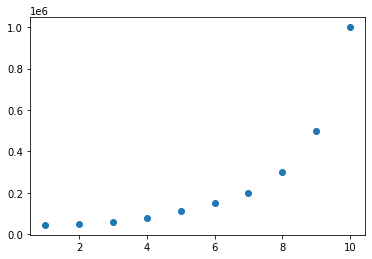

In [12]:
plt.scatter(X,Y)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
LR = LinearRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.8451346684575975

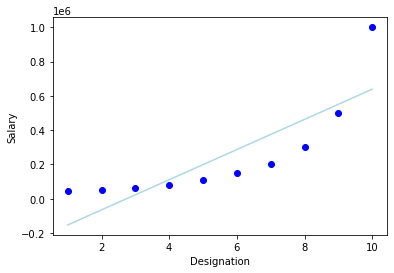

In [59]:
plt.scatter(X, Y, c = 'blue')
plt.plot(X, LR.predict(X), c = 'lightblue')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()


In [19]:
level = float(input())
LR.predict([[level]])


8


array([[462844.82758621]])

## Polynomial Regression
## Degree 2

In [34]:
df = pd.read_csv('ps.csv')
X = df.iloc[:,1:2]
Y = df.iloc[:,2:]


In [35]:
PF = PolynomialFeatures(degree = 2)
X = PF.fit_transform(X)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
PR2 = LinearRegression()
PR2.fit(X_train, Y_train)
y_pred = PR2.predict(X_test)
score = r2_score(Y_test,y_pred)
score



0.7896604512664294

model is not accurate so let's try degree 5

## Degree 5

In [37]:
df = pd.read_csv('ps.csv')
X = df.iloc[:,1:2]
Y = df.iloc[:,2:]

In [38]:
PF = PolynomialFeatures(degree = 5)
X = PF.fit_transform(X)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
PR5 = LinearRegression()
PR5.fit(X_train, Y_train)
y_pred = PR5.predict(X_test)
score = r2_score(Y_test,y_pred)
score

0.9950481764358288

In [41]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [45]:
level = float(input())
PR5.predict(PF.fit_transform([[level]]))

7


array([[200675.06568791]])

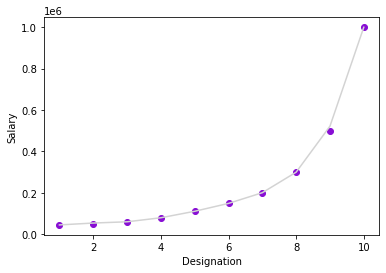

In [53]:
X = df.iloc[:,1:2]
plt.scatter(X, Y, c = '#880ED4')
plt.plot(X, PR5.predict(PF.fit_transform(X)), c = 'lightgrey')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()